# Question 1

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
plt.rcParams['figure.constrained_layout.use'] = True

from gaussian_em import gaussianEM
from bernoulli_em import bernoulliEM
from k_means import Kmeans

In [2]:
data_file="../data/A2Q1.csv"

## Sub-Question i.

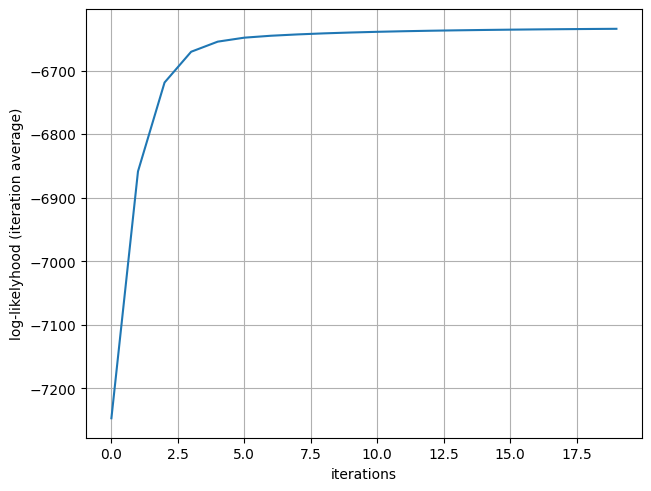

In [3]:
logl = None
iterations = 100
for i in range(iterations):
    bem = bernoulliEM(data_file=data_file,
                      num_mixtures=4,
                      seed=i+1,
                      max_iterations=20)
    
    bem.run()
    if logl is None:
        logl = np.array(bem.logl)
    else:
        logl = logl+np.array(bem.logl)
        

plt.figure()
plt.grid("on")
plt.xlabel("iterations")
plt.ylabel("log-likelyhood (iteration average)")
plt.plot(logl/iterations)
plt.savefig("../outputs/question1/q1_i_avg_logl.png")
plt.show()

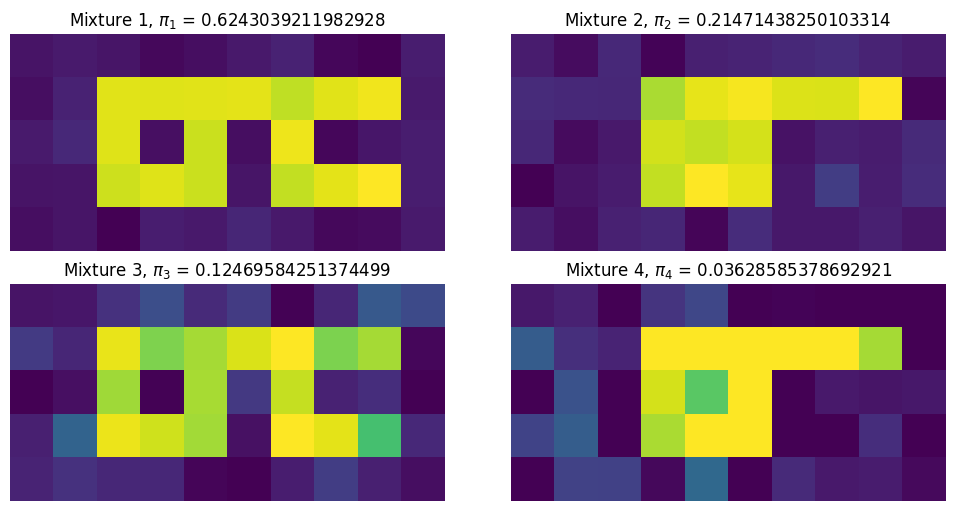

In [4]:
bem = bernoulliEM(data_file="../data/A2Q1.csv",
                num_mixtures=4,
                seed=3, 
                max_iterations=10)

bem.run()

plt.figure(figsize = (10,5))

for i, bi in enumerate(bem.prob):
    plt.subplot(2, 2, i+1)
    plt.axis("off")
    plt.title(f"Mixture {i+1}, $\pi_{i+1}$ = {bem.pi[i]}")
    plt.imshow(bi.reshape(5,10))

plt.savefig("../outputs/question1/q1_i_cluster_probab.png")
plt.show()

## Sub-Question ii.

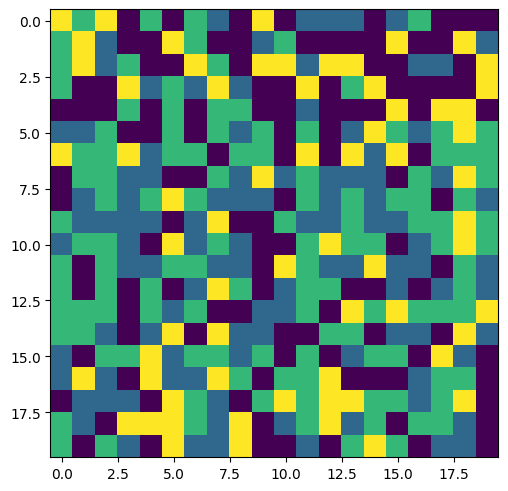

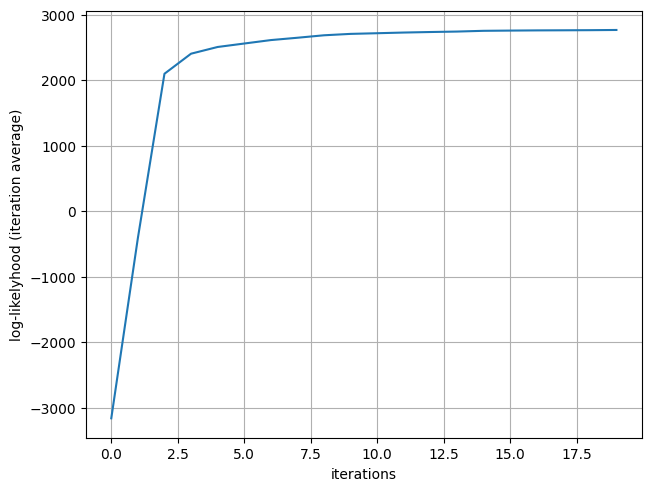

In [5]:
logl = None
iterations = 100

for i in range(iterations):
    gem = gaussianEM(data_file="../data/A2Q1.csv",
                     num_mixtures=4,
                     seed=i+1,
                     max_iterations=20)
    
    gem.run()
    if logl is None:
        logl = np.array(gem.logl)
    else:
        logl = logl+np.array(gem.logl)

    if i==0:
        
        map = np.zeros_like(gem.lam[0], dtype=int)
        for i in range(gem.lam.shape[1]):
            map[i] = np.argmax(gem.lam[:, i])
        
        plt.figure()
        plt.imshow(map.reshape(20,20))
        
plt.figure()
plt.grid("on")
plt.xlabel("iterations")
plt.ylabel("log-likelyhood (iteration average)")
plt.plot(logl/iterations)
plt.savefig("../outputs/question1/q1_ii_avg_logl.png")
plt.show()

## Sub-Question iii.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 2 0
 2 3 3 2 3 2 2 2 0 2 0 3 3 3 3 0 0 0 3 3 0 3 3 2 3 0 3 0 3 0 3 3 0 2 0 3 2
 3 3 3 3 0 0 0 3 3 2 0 3 3 2 2 0 2 2 2 3 3 0 2 3 2 3 2 2 3 3 3 2 0 0 3 2 2
 3 3 0 3 2 3 0 3 0 3 2 3 0 3 0 3 2 2 3 3 2 3 3 0 2 0 0 0 3 0 0 2 3 2 2 3 3
 3 2 2 0 3 3 2 3 0 2 2 2 3 3 3 3 3 3 0 3 3 3 3 2 2 2 3 2 2 3 3 0 0 2 3 2 2
 3 3 3 3 3 3 2 2 3 3 3 2 2 2 0 2 2 0 0 2 2 3 3 2 3 0 2 3 0 2 0 3 2 3 0 3 2
 3 3 0 2 3 0 2 3 0 3 0 3 3 3 3 3 3 2 3 0 3 2 0 3 2 3 3 3 0 0 3 3 3 0 3 2 3
 2 3 0 2 2 3 2 0 2 3 0 3 2 3 2 3 0 2 0 2 2 3 3 2 2 2 0 3 2 2 0 0 3 3 2 2 2
 0 2 2 3 0 3 0 2 3 0 2 3 2 2 2 0 2 2 2 3 2 2 0 3 3 3 2 3 0 3]
{0: 67, 1: 100, 2: 97, 3: 136}


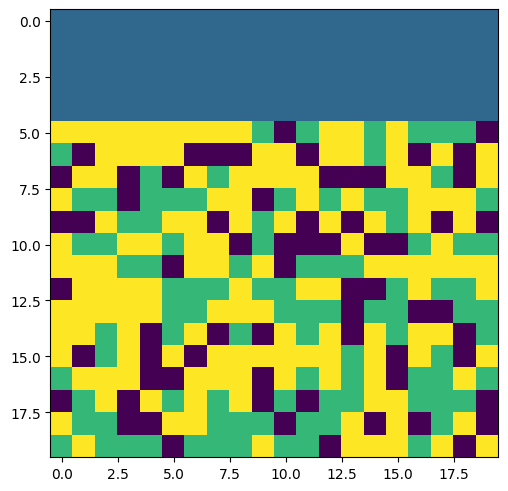

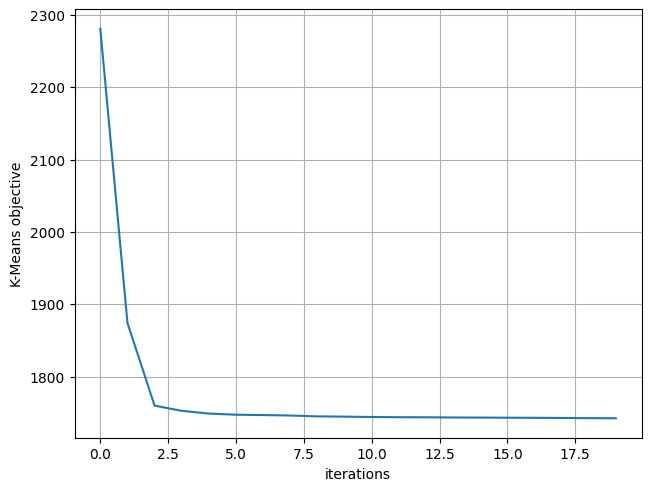

In [6]:
km = Kmeans(data_file=data_file,
            num_clusters=4,
            seed=1,
            initialize_method="random")
km.run()

print(km.z_cur)
mp = {0:0, 1:0, 2:0, 3:0}

for i in range(400):
    mp[km.z_cur[i]] += 1

img = km.z_cur.reshape((20,20))
plt.figure()
plt.imshow(img)

print(mp)
plt.figure()
plt.grid("on")
plt.xlabel("iterations")
plt.ylabel("K-Means objective")
plt.plot(km.errors)
plt.savefig("../outputs/question1/q1_iii_kmeans.png")
plt.show()